In [70]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas
import montecarlo as mc
import seaborn as sns
import panel as pn
from panel.interact import interact

from iexfinance.stocks import get_historical_data
import iexfinance as iex

In [5]:
mc.iex_search_ticker("BT")

No database was provided 
Getting data base from IEX...
Succesfully downloaded database.


,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
1078,USD,2019-09-16,NYS,IEX_5631425642392D52,True,BT Group PLC Sponsored ADR,US,BT,ad
1079,USD,2019-09-16,NYS,IEX_4C4E3631534B2D52,True,Blackrock Long-Term Municipal Advantage Trust,US,BTA,cef
1080,USD,2019-09-16,NAS,IEX_5338304432582D52,True,BioXcel Therapeutics Inc.,US,BTAI,cs
1081,USD,2019-09-16,PSE,IEX_48344B534E472D52,True,AGFiQ U.S. Market Neutral Anti-Beta Fund,US,BTAL,et
1082,USD,2019-09-16,NYS,IEX_4A53373552372D52,True,Baytex Energy Corp.,US,BTE,cs
1083,USD,2019-09-16,NAS,IEX_48445A5737332D52,True,Principal Healthcare Innovators Index ETF,US,BTEC,et
1084,USD,2019-09-16,ASE,IEX_4C4E344351332D52,True,B2Gold Corp.,US,BTG,cs
1085,USD,2019-09-16,NYS,IEX_47474A3732312D52,True,British American Tobacco PLC Sponsored ADR,US,BTI,ad
1086,USD,2019-09-16,ASE,IEX_4354533632582D52,True,Ballantyne Strong Inc.,US,BTN,cs
1087,USD,2019-09-16,NYS,IEX_4D324C3344322D52,True,John Hancock Financial Opportunities Fund,US,BTO,cef


## No BTC from IEX. I'll have to add another API into the library later. X testing purposes, I'll keep going with regular stocks from IEX iCloud.


In [7]:
#Im gonna use Netflix instead of bitcoin x now.
mc.iex_search_ticker("NFL")

No database was provided 
Getting data base from IEX...
Succesfully downloaded database.


,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
5453,USD,2019-09-16,PSE,IEX_534D533150372D52,True,Virtus Newfleet Multi-Sector Bond ETF,US,NFLT,et
5454,USD,2019-09-16,NAS,IEX_43344330424C2D52,True,Netflix Inc.,US,NFLX,cs


In [10]:
list_of_tickers = ["GOOG", "AMZN", "NFLX"]

In [13]:
portfolio_hist_prices = mc.get_historic_data(ticker = list_of_tickers, 
                                             start_date = datetime.now() + timedelta(-365*5))
portfolio_hist_prices.head()

GOOG             AMZN            NFLX          
             close   volume   close   volume  close    volume
date                                                         
2014-09-17  583.17  1695637  324.00  4138950  64.93  12135654
2014-09-18  587.66  1445971  325.00  2577706  65.57  10631340
2014-09-19  594.45  3737278  331.32  6886382  65.36  11962754
2014-09-22  585.76  1692344  324.50  3118649  63.25  16176873
2014-09-23  579.54  1471733  323.63  2353590  63.41  11474294

In [14]:
#Wrap this is in function in the library!!!!!
col_to_drop = portfolio_hist_prices.columns.levels[1].values
col_to_drop = np.delete(col_to_drop,np.where(col_to_drop=="close"))
portfolio_daily_retn = portfolio_hist_prices.drop(columns=col_to_drop, level=1).copy()
portfolio_daily_retn.columns = portfolio_daily_retn.columns.droplevel(1)
portfolio_daily_retn = portfolio_daily_retn.pct_change()

portfolio_daily_retn

,GOOG,AMZN,NFLX
date,,,
2014-09-17,NaN,NaN,NaN
2014-09-18,0.007699,0.003086,0.009857
2014-09-19,0.011554,0.019446,-0.003203
2014-09-22,-0.014619,-0.020584,-0.032283
2014-09-23,-0.010619,-0.002681,0.002530
2014-09-24,0.011802,0.014152,0.015140
2014-09-25,-0.021982,-0.019134,-0.015691
2014-09-26,0.003540,0.003976,0.011837
2014-09-29,-0.001286,-0.004301,0.001716


In [130]:
def corr_plot(portfolio_daily_retn):
    correlated = portfolio_daily_retn.corr()
    #correlated
    #A failed attemp to use hvplot to create a heatmap. Worthy of more research.
    #correlated_plot = correlated.hvplot.heatmap(x = correlated.index.values, y = correlated.columns.values)
    #correlated_plot #didn't work. It would be cool to find another way.
    # Generate a mask for the upper triangle
    mask = np.zeros_like(correlated, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    correlated_plot, ax = plt.subplots(figsize=(6, 4))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlated, mask=mask, cmap="coolwarm", vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, 
                #cbar_kws={"shrink": .5}
               )
    
    #correlated_plot = sns.heatmap(correlated, vmin=-1, vmax=1, annot=True,cmap="coolwarm") 
    plt.close()
    return pn.Pane(correlated_plot)

In [118]:
def sharp_rt_plot(portfolio_daily_retn):
    
    sharp_ratios = portfolio_daily_retn.mean()*np.sqrt(252)/portfolio_daily_retn.std()
    
    #with hvplot(): 
    #sr_plot = sharp_ratios.hvplot.bar()
    
    sr_plot = plt.figure();
    plt.bar(x = sharp_ratios.index, height=sharp_ratios)
    plt.axhline(sharp_ratios.mean(), color='r')
    #plt.ylim(sharp_ratios.min()*0.997,sharp_ratios.max()*1.002)
    plt.close()
    return sr_plot

In [62]:

monte_carlo_sim = mc.monte_carlo_sim(df=portfolio_hist_prices, trials=10, sim_days=252)

def plot_mont_carl(monte_carlo_sim):
    plot_title = f"title"
    monte_carlo_sim_plot = monte_carlo_sim.hvplot(title=plot_title,figsize=(18,10))
    return monte_carlo_sim_plot

In [92]:
def get_conf_interval(db,q=[0.05, 0.95]):
    confidence_interval = db.iloc[-1].quantile(q=q)
    return confidence_interval

In [93]:
def plot_conf(values=monte_carlo_sim.iloc[-1],conf=confidence_interval):
    conifidence_plot = plt.figure();
    #plt.plot(values,kind='hist', density=True, bins=20)
    plt.hist(x = values,bins=20)
    plt.axvline(conf.iloc[0], color='r')
    plt.axvline(conf.iloc[1], color='r')
    plt.close()
    return pn.Pane(conifidence_plot)

# DASHBOARD TIME!!!

Tabs
    [0] Tabs
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure, name='Sharp Ratios')
    [1] Tabs
        [0] HoloViews(NdOverlay, name='monte Carlo Simulation')
        [1] Matplotlib(Figure)
    [2] Tabs
        [0] Markdown(str, name='TA1')
        [1] Markdown(str, name='TA2')
    [3] Markdown(str, name='Report')
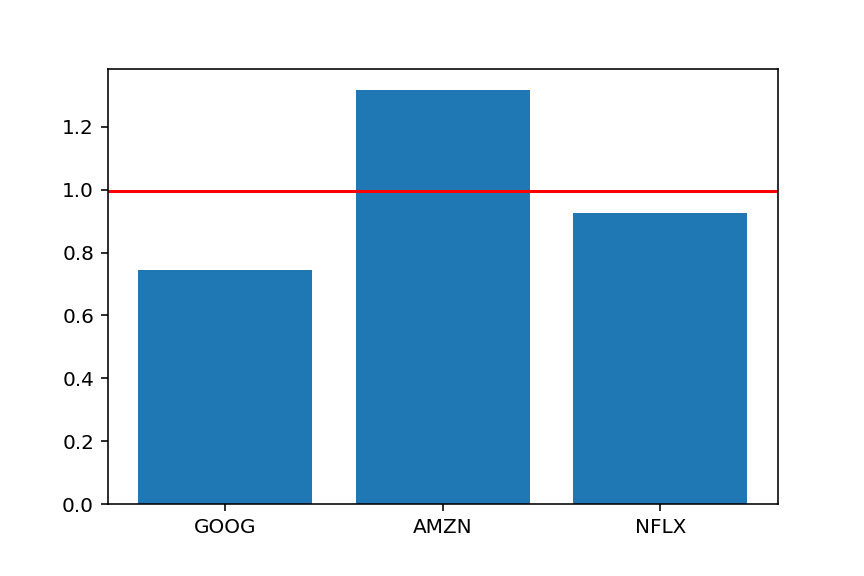
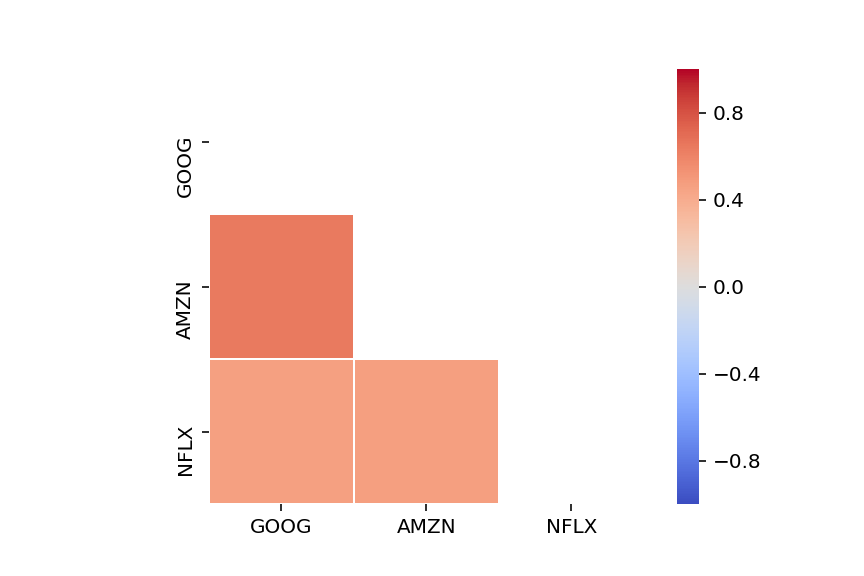
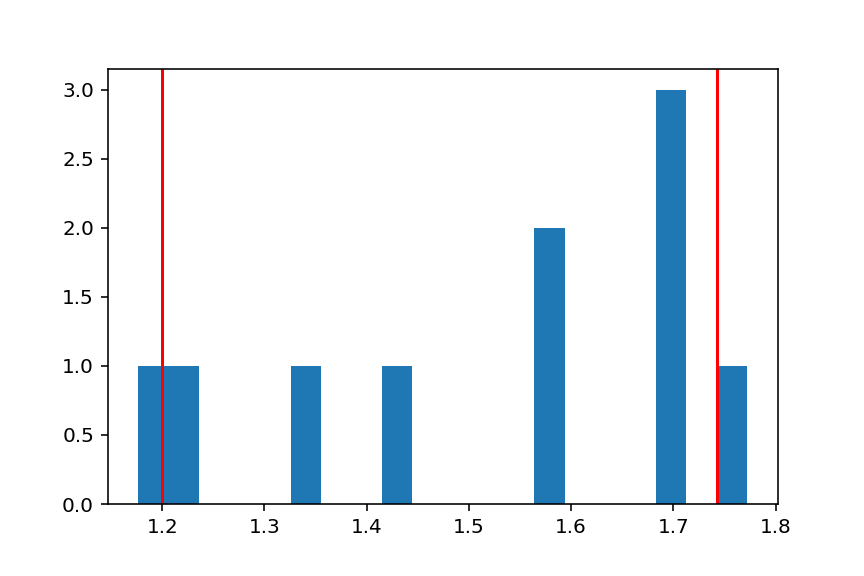

In [129]:
risk_tabs = pn.Tabs(
    ("Correlation of portfolio",corr_plot(portfolio_daily_retn)),
    ("Sharp Ratios", sharp_rt_plot(portfolio_daily_retn))
)
montecarlo_tabs = pn.Tabs(
    ("monte Carlo Simulation",plot_mont_carl(monte_carlo_sim)),
    ("Confidence Intervals", plot_conf(monte_carlo_sim.iloc[-1],get_conf_interval(monte_carlo_sim)))
)
techl_analysis_tabs = pn.Tabs(
    ("TA1","in construction"),
    ("TA2", "in construction")
)
tabs = pn.Tabs(
    ("Risk",risk_tabs),
    ("Monte Carlo Simulation", montecarlo_tabs),
    ("Tecnical Analysis", techl_analysis_tabs),
    ("Report", "in construction")
)
    
panel = tabs

panel